# Aula 04 - Missão Impossível: Cruzando Bases de Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)

In [2]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace('.','').astype(float)
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados["Metragem"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [4]:
ibge_sp = pd.read_csv(
  'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv', 
  encoding='ISO-8859-1', sep=';', thousands='.', decimal=',')
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

Cod_setor  Cod_Grandes Regiï¿½es Nome_Grande_Regiao  Cod_UF  \
0  355030801000001                      3   Regiï¿½o Sudeste      35   
1  355030801000002                      3   Regiï¿½o Sudeste      35   
2  355030801000003                      3   Regiï¿½o Sudeste      35   
3  355030801000004                      3   Regiï¿½o Sudeste      35   
4  355030801000005                      3   Regiï¿½o Sudeste      35   

   Nome_da_UF   Cod_meso                  Nome_da_meso  Cod_micro  \
0  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
1  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
2  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
3  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
4  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   

  Nome_da_micro  Cod_RM  ... V003  V004    V005       V006    V007       V008  \
0   Sï¿½o Paulo      20  ... 3.01  2.32 2091.32 8532451.78 2164.55 8673276.78   
1   Sï¿½o Paulo      20  ... 2.98  2.09 1650.09 3983441.31 1717.44 4030519.99   
2   Sï¿½o Paulo      20  ... 3.31  3.08 1280.43 5474593.06 2349.53 7553913.02   
3   Sï¿½o Paulo      20  ... 3.16  2.26 1119.59 3572955.10 1859.13 4567289.50   
4   Sï¿½o Paulo      20  ... 3.14  2.35 1416.90 2240207.58 1581.66 2240109.39   

     V009       V010    V011       V012  
0 1227.41 4285771.99 1713.75 5152087.86  
1 1045.78 2572133.32 1468.08 2991546.94  
2  902.97 2735492.52 1786.79 3837674.74  
3  869.09 2122409.02 1567.41 2735383.24  
4  917.71 1570047.75 1356.35 1725877.85  

[5 rows x 33 columns]

In [5]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [6]:
dados_vendas

Rua              Bairro     Cidade  \
0               Avenida Itacira, 255    Planalto Paulista  São Paulo   
1      Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
2                     Rua Alba Valdez     Jardim Reimberg  São Paulo   
3                                 NaN      Jardim Morumbi  São Paulo   
4            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                               ...                 ...        ...   
10002                   Avenida Odila   Planalto Paulista  São Paulo   
10003                      Rua Tapuçu          Vila Sofia  São Paulo   
10004                   Rua Guararema     Bosque da Saúde  São Paulo   
10005               Rua Estero Belaco       Vila da Saúde  São Paulo   
10007      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

       Metragem  Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio  \
0          1000        4          8      6  R$ 7.000.000    R$     7.000.000   
1           496        4          4      4  R$ 3.700.000    R$     3.700.000   
2           125        4          3      2    R$ 380.000    R$       380.000   
3           310        3          2      4    R$ 685.000    R$       685.000   
4           100        3          2      2    R$ 540.000    R$       540.000   
...         ...      ...        ...    ...           ...   ...           ...   
10002       267        3          6      4  R$ 1.500.000    R$     1.500.000   
10003        95        2          2      2    R$ 665.000    R$       665.000   
10004       605        8          7      5  R$ 2.300.000    R$     2.300.000   
10005       205        3          3      6  R$ 1.050.000    R$     1.050.000   
10007       122        3          2      2    R$ 270.000    R$       270.000   

      Tipo_anuncio  Valor_anuncio_float  Valor_m2  
0             None           7000000.00   7000.00  
1             None           3700000.00   7459.68  
2             None            380000.00   3040.00  
3             None            685000.00   2209.68  
4             None            540000.00   5400.00  
...            ...                  ...       ...  
10002         None           1500000.00   5617.98  
10003         None            665000.00   7000.00  
10004         None           2300000.00   3801.65  
10005         None           1050000.00   5121.95  
10007         None            270000.00   2213.11  

[9156 rows x 13 columns]

In [7]:
enderecos = pd.read_csv('/content/drive/MyDrive/Imersao_Dados_4_Alura/enderecos.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
enderecos.head()

tipo_logr                      logr_nome  \
0       Rua               Armando Silveira   
1       Rua       João Antônio Vasconcelos   
2       Rua  Prefeito Agenor Barcelos Feio   
3       Rua                Sebastião Gomes   
4       Rua            Marquês do Alegrete   

                                   logr_compl numero            bairro  \
0                        Rua Armando Silveira    NaN            Divisa   
1  Rua João Antônio Vasconcelos - até 627/628    627           Amizade   
2           Rua Prefeito Agenor Barcelos Feio    NaN          Registro   
3             Rua Sebastião Gomes - até 59/60     59          Registro   
4                     Rua Marquês do Alegrete    NaN  Parque das Águas   

         nome_localidade sigla_uf         cep  latitude  longitude  
0  Santana do Livramento       RS 97573200.00    -30.88     -55.55  
1              Araçatuba       SP 16074320.00    -21.19     -50.45  
2  Santana do Livramento       RS 97571090.00    -30.86     -55.56  
3  Santana do Livramento       RS 97571374.00    -30.86     -55.55  
4  Santana do Livramento       RS 97571500.00    -30.86     -55.55

In [9]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

tipo_logr                  logr_nome  \
1             Rua   João Antônio Vasconcelos   
413269        Rua                          A   
413270        Rua                          A   
413271        Rua                          A   
413272        Rua               João Bandini   
...           ...                        ...   
1113858       Rua            Daniel Buccieri   
1113865       Rua             Ottorino Rizzi   
1113873       Rua  Adriano Michelutti Cândia   
1113882   Rodovia              Mario Tonolli   
1113884       Rua                 Tiradentes   

                                         logr_compl numero  \
1        Rua João Antônio Vasconcelos - até 627/628    627   
413269                                        Rua A    NaN   
413270                                        Rua A    NaN   
413271                                        Rua A    NaN   
413272                             Rua João Bandini    NaN   
...                                             ...    ...   
1113858                         Rua Daniel Buccieri    NaN   
1113865                          Rua Ottorino Rizzi    NaN   
1113873               Rua Adriano Michelutti Cândia    NaN   
1113882                       Rodovia Mario Tonolli    NaN   
1113884  Rua Tiradentes - de 181 a 369 - lado ímpar    181   

                         bairro nome_localidade sigla_uf         cep  \
1                       Amizade       Araçatuba       SP 16074320.00   
413269            Jardim Glória       Americana       SP 13468220.00   
413270         Jardim São Roque       Americana       SP 13469414.00   
413271   Iate Clube de Campinas       Americana       SP 13475620.00   
413272            Jardim Miriam       Americana       SP 13469072.00   
...                         ...             ...      ...         ...   
1113858         Jardim Alvorada       Monte Mor       SP 13198524.00   
1113865              Royal Park  Ribeirão Preto       SP 14028563.00   
1113873     Jardim San Marco II  Ribeirão Preto       SP 14035198.00   
1113882              Morro Alto         Itupeva       SP 13297002.00   
1113884            Vila Queiroz  Artur Nogueira       SP 13163000.00   

         latitude  longitude  
1          -21.19     -50.45  
413269     -22.76     -47.34  
413270     -22.74     -47.35  
413271     -22.74     -47.33  
413272     -22.74     -47.35  
...           ...        ...  
1113858    -22.93     -47.27  
1113865    -21.24     -47.83  
1113873    -21.20     -47.74  
1113882    -23.19     -47.08  
1113884    -22.58     -47.17  

[298124 rows x 10 columns]

In [10]:
enderecos_sp['rua'] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


tipo_logr                 logr_nome  \
1            Rua  João Antônio Vasconcelos   
413269       Rua                         A   
413270       Rua                         A   
413271       Rua                         A   
413272       Rua              João Bandini   

                                        logr_compl numero  \
1       Rua João Antônio Vasconcelos - até 627/628    627   
413269                                       Rua A    NaN   
413270                                       Rua A    NaN   
413271                                       Rua A    NaN   
413272                            Rua João Bandini    NaN   

                        bairro nome_localidade sigla_uf         cep  latitude  \
1                      Amizade       Araçatuba       SP 16074320.00    -21.19   
413269           Jardim Glória       Americana       SP 13468220.00    -22.76   
413270        Jardim São Roque       Americana       SP 13469414.00    -22.74   
413271  Iate Clube de Campinas       Americana       SP 13475620.00    -22.74   
413272           Jardim Miriam       Americana       SP 13469072.00    -22.74   

        longitude                           rua  
1          -50.45  rua joão antônio vasconcelos  
413269     -47.34                         rua a  
413270     -47.35                         rua a  
413271     -47.33                         rua a  
413272     -47.35              rua joão bandini

Removendo sinais dos nomes com o uso de regex

In [11]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

0
0            Avenida Itacira
1  Rua Aurelia Perez Alvarez
2            Rua Alba Valdez
3                        NaN
4         Rua Tobias Barreto
5            Rua Graham Bell
6        Rua Francisco Paulo
7      Rua Guilherme Valente
8        Rua Sagrada Família
9                 Rua Tapaji

In [12]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio Tipo_anuncio  \
0        4          8      6  R$ 7.000.000    R$     7.000.000         None   
1        4          4      4  R$ 3.700.000    R$     3.700.000         None   
2        4          3      2    R$ 380.000    R$       380.000         None   
3        3          2      4    R$ 685.000    R$       685.000         None   
4        3          2      2    R$ 540.000    R$       540.000         None   

   Valor_anuncio_float  Valor_m2                 apenas_rua  
0           7000000.00   7000.00            avenida itacira  
1           3700000.00   7459.68  rua aurelia perez alvarez  
2            380000.00   3040.00            rua alba valdez  
3            685000.00   2209.68                        NaN  
4            540000.00   5400.00         rua tobias barreto

Realizando a junção dos dataframes "dados_vendas" e "enderecos_sp"

In [13]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], 
                     how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query(("cep > 0"))
dados_geo

Rua              Bairro     Cidade  \
0                Avenida Itacira, 255    Planalto Paulista  São Paulo   
5       Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
6                      Rua Alba Valdez     Jardim Reimberg  São Paulo   
7                                  NaN      Jardim Morumbi  São Paulo   
26            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                                ...                 ...        ...   
173078                   Avenida Odila   Planalto Paulista  São Paulo   
173097                      Rua Tapuçu          Vila Sofia  São Paulo   
173116                   Rua Guararema     Bosque da Saúde  São Paulo   
173135               Rua Estero Belaco       Vila da Saúde  São Paulo   
173154      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

        Metragem  Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio  \
0           1000        4          8      6  R$ 7.000.000    R$     7.000.000   
5            496        4          4      4  R$ 3.700.000    R$     3.700.000   
6            125        4          3      2    R$ 380.000    R$       380.000   
7            310        3          2      4    R$ 685.000    R$       685.000   
26           100        3          2      2    R$ 540.000    R$       540.000   
...          ...      ...        ...    ...           ...   ...           ...   
173078       267        3          6      4  R$ 1.500.000    R$     1.500.000   
173097        95        2          2      2    R$ 665.000    R$       665.000   
173116       605        8          7      5  R$ 2.300.000    R$     2.300.000   
173135       205        3          3      6  R$ 1.050.000    R$     1.050.000   
173154       122        3          2      2    R$ 270.000    R$       270.000   

       Tipo_anuncio  Valor_anuncio_float  Valor_m2                 apenas_rua  \
0              None           7000000.00   7000.00            avenida itacira   
5              None           3700000.00   7459.68  rua aurelia perez alvarez   
6              None            380000.00   3040.00            rua alba valdez   
7              None            685000.00   2209.68                        NaN   
26             None            540000.00   5400.00         rua tobias barreto   
...             ...                  ...       ...                        ...   
173078         None           1500000.00   5617.98                        NaN   
173097         None            665000.00   7000.00                        NaN   
173116         None           2300000.00   3801.65                        NaN   
173135         None           1050000.00   5121.95                        NaN   
173154         None            270000.00   2213.11                        NaN   

                              rua         cep  latitude  longitude  
0                 avenida itacira 11443160.00    -23.98     -46.20  
5       rua aurelia perez alvarez  4642020.00    -23.64     -46.69  
6                 rua alba valdez  4845200.00    -23.75     -46.70  
7                             NaN 18125000.00    -23.53     -47.26  
26             rua tobias barreto 13474663.00    -22.70     -47.29  
...                           ...         ...       ...        ...  
173078                        NaN 18125000.00    -23.53     -47.26  
173097                        NaN 18125000.00    -23.53     -47.26  
173116                        NaN 18125000.00    -23.53     -47.26  
173135                        NaN 18125000.00    -23.53     -47.26  
173154                        NaN 18125000.00    -23.53     -47.26  

[8641 rows x 18 columns]

In [14]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

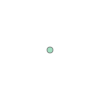

In [15]:
from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

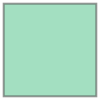

In [16]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [17]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1, 0.9))

True

In [18]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 34.5 MB/s 
     |████████████████████████████████| 16.7 MB 280 kB/s 


In [19]:
import geopandas as gpd

In [20]:
setor_censo = gpd.read_file('/content/drive/MyDrive/Imersao_Dados_4_Alura/35SEE250GC_SIR.shp')
setor_censo.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0 98237.00  354100005000009  URBANO  35410000500       None  354100005   
1 98232.00  354100005000004  URBANO  35410000500       None  354100005   
2 98230.00  354100005000002  URBANO  35410000500       None  354100005   
3 98229.00  354100005000001  URBANO  35410000500       None  354100005   
4 98231.00  354100005000003  URBANO  35410000500       None  354100005   

     NM_DISTRIT CD_GEOCODM    NM_MUNICIP NM_MICRO                     NM_MESO  \
0  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
1  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
2  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
3  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
4  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   

     CD_GEOCODB  NM_BAIRRO  ID1  \
0  354100005001  Boqueirão    1   
1  354100005001  Boqueirão    2   
2  354100005001  Boqueirão    3   
3  354100005001  Boqueirão    4   
4  354100005001  Boqueirão    5   

                                            geometry  
0  POLYGON ((-46.41024 -24.01103, -46.41169 -24.0...  
1  POLYGON ((-46.41606 -24.00245, -46.41598 -24.0...  
2  POLYGON ((-46.41213 -24.00792, -46.41244 -24.0...  
3  POLYGON ((-46.41134 -24.00552, -46.41196 -24.0...  
4  POLYGON ((-46.41326 -24.00514, -46.41484 -24.0...

In [21]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(longitude, latitude))]

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
54041 119535.00  355030853000029  URBANO  35503085300       None  355030853   

      NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
54041      MOOCA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

      CD_GEOCODB NM_BAIRRO    ID1  \
54041       None      None  54042   

                                                geometry  
54041  POLYGON ((-46.59147 -23.56009, -46.59102 -23.5...

Fazendo junção novamente

In [22]:
dados_geo["Point"] = ""
for i in dados_geo.index:
  dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Rua              Bairro     Cidade  \
0                Avenida Itacira, 255    Planalto Paulista  São Paulo   
5       Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
6                      Rua Alba Valdez     Jardim Reimberg  São Paulo   
7                                  NaN      Jardim Morumbi  São Paulo   
26            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                                ...                 ...        ...   
173078                   Avenida Odila   Planalto Paulista  São Paulo   
173097                      Rua Tapuçu          Vila Sofia  São Paulo   
173116                   Rua Guararema     Bosque da Saúde  São Paulo   
173135               Rua Estero Belaco       Vila da Saúde  São Paulo   
173154      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

        Metragem  Quartos  Banheiros  Vagas         Valor Moeda Valor_anuncio  \
0           1000        4          8      6  R$ 7.000.000    R$     7.000.000   
5            496        4          4      4  R$ 3.700.000    R$     3.700.000   
6            125        4          3      2    R$ 380.000    R$       380.000   
7            310        3          2      4    R$ 685.000    R$       685.000   
26           100        3          2      2    R$ 540.000    R$       540.000   
...          ...      ...        ...    ...           ...   ...           ...   
173078       267        3          6      4  R$ 1.500.000    R$     1.500.000   
173097        95        2          2      2    R$ 665.000    R$       665.000   
173116       605        8          7      5  R$ 2.300.000    R$     2.300.000   
173135       205        3          3      6  R$ 1.050.000    R$     1.050.000   
173154       122        3          2      2    R$ 270.000    R$       270.000   

       Tipo_anuncio  Valor_anuncio_float  Valor_m2                 apenas_rua  \
0              None           7000000.00   7000.00            avenida itacira   
5              None           3700000.00   7459.68  rua aurelia perez alvarez   
6              None            380000.00   3040.00            rua alba valdez   
7              None            685000.00   2209.68                        NaN   
26             None            540000.00   5400.00         rua tobias barreto   
...             ...                  ...       ...                        ...   
173078         None           1500000.00   5617.98                        NaN   
173097         None            665000.00   7000.00                        NaN   
173116         None           2300000.00   3801.65                        NaN   
173135         None           1050000.00   5121.95                        NaN   
173154         None            270000.00   2213.11                        NaN   

                              rua         cep  latitude  longitude  \
0                 avenida itacira 11443160.00    -23.98     -46.20   
5       rua aurelia perez alvarez  4642020.00    -23.64     -46.69   
6                 rua alba valdez  4845200.00    -23.75     -46.70   
7                             NaN 18125000.00    -23.53     -47.26   
26             rua tobias barreto 13474663.00    -22.70     -47.29   
...                           ...         ...       ...        ...   
173078                        NaN 18125000.00    -23.53     -47.26   
173097                        NaN 18125000.00    -23.53     -47.26   
173116                        NaN 18125000.00    -23.53     -47.26   
173135                        NaN 18125000.00    -23.53     -47.26   
173154                        NaN 18125000.00    -23.53     -47.26   

                                  Point      setor_censo  
0        POINT (-46.2013172 -23.975993)              NaN  
5       POINT (-46.6883114 -23.6409612)  355030871000023  
6         POINT (-46.6958895 -23.75299)  355030830000050  
7       POINT (-47.2550228 -23.5310431)              NaN  
26      POINT (-47.2944609 -22.6989009)              NaN  
...              

Para não perder tempo usaremos a base já pronta

In [23]:
dados_geo = pd.read_csv('/content/drive/MyDrive/Imersao_Dados_4_Alura/dados_geo.csv')
dados_geo.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3        Rua Tobias Barreto, 195                Mooca  São Paulo       100   
4                 Rua Graham Bell         Santo Amaro  São Paulo       440   

   Quartos  Banheiros  Vagas         Valor  Valor_anuncio  Tipo_anuncio  \
0        4          8      6  R$ 7.000.000     7000000.00           NaN   
1        4          4      4  R$ 3.700.000     3700000.00           NaN   
2        4          3      2    R$ 380.000      380000.00           NaN   
3        3          2      2    R$ 540.000      540000.00           NaN   
4        4          4      6  R$ 1.980.000     1980000.00           NaN   

   Valor_mm  Valor_m2                        rua        cep  latitude  \
0      7.00   7000.00            Avenida Itacira 4061000.00    -23.62   
1      3.70   7459.68  Rua Aurelia Perez Alvarez 4642020.00    -23.64   
2      0.38   3040.00            Rua Alba Valdez 4845200.00    -23.75   
3      0.54   5400.00         Rua Tobias Barreto 3176000.00    -23.55   
4      1.98   4500.00            Rua Graham Bell 4737030.00    -23.59   

   longitude                            Point        setor_censo  
0     -46.65  POINT (-46.6481622 -23.6157934) 355030877000067.00  
1     -46.69  POINT (-46.6883114 -23.6409612) 355030871000023.00  
2     -46.70    POINT (-46.6958895 -23.75299) 355030830000050.00  
3     -46.59  POINT (-46.5881729 -23.5499597) 355030808000050.00  
4     -46.76  POINT (-46.7600773 -23.5937964) 355030865000169.00

In [24]:
len(dados_geo["setor_censo"].notnull())

5605

In [25]:
dados_vendas_censo = pd.merge(left = dados_geo[dados_geo["setor_censo"].notnull()], right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

Rua              Bairro     Cidade  Metragem  \
0              Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1     Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                    Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3           Rua Tobias Barreto, 195                Mooca  São Paulo       100   
4                    Rua Graham Bell         Santo Amaro  São Paulo       440   
...                              ...                 ...        ...       ...   
5315              Rua Pedro Teixeira        Vila Olímpia  São Paulo       157   
5316                   Avenida Odila   Planalto Paulista  São Paulo       267   
5317                      Rua Tapuçu          Vila Sofia  São Paulo        95   
5318               Rua Estero Belaco       Vila da Saúde  São Paulo       205   
5319      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo       122   

      Quartos  Banheiros  Vagas         Valor  Valor_anuncio  Tipo_anuncio  \
0           4          8      6  R$ 7.000.000     7000000.00           NaN   
1           4          4      4  R$ 3.700.000     3700000.00           NaN   
2           4          3      2    R$ 380.000      380000.00           NaN   
3           3          2      2    R$ 540.000      540000.00           NaN   
4           4          4      6  R$ 1.980.000     1980000.00           NaN   
...       ...        ...    ...           ...            ...           ...   
5315        3          2      2    R$ 960.000      960000.00           NaN   
5316        3          6      4  R$ 1.500.000     1500000.00           NaN   
5317        2          2      2    R$ 665.000      665000.00           NaN   
5318        3          3      6  R$ 1.050.000     1050000.00           NaN   
5319        3          2      2    R$ 270.000      270000.00           NaN   

      ...  V003  V004    V005        V006    V007        V008    V009  \
0     ...  2.66  2.04 3158.96 22210644.93 5570.65 25770816.97 2096.19   
1     ...  3.13  1.96 7600.44 36778930.17 7890.53 35886906.64 4149.00   
2     ...  3.47  3.06  805.13   769188.78 1011.75   757433.42  518.77   
3     ...  3.00  1.99 2338.05  7826370.15 2447.89  7925839.76 1543.29   
4     ...  3.51  2.31 1026.36   272168.67 1143.96   167733.64  735.67   
...   ...   ...   ...     ...         ...     ...         ...     ...   
5315  ...  2.17  1.27 5054.58 33245189.73 5231.93 33485189.78 3649.06   
5316  ...  2.81  1.60 4249.33 24499871.44 5180.14 25047413.33 2618.76   
5317  ...  2.99  1.81 2425.09  6878872.25 2543.80  6913867.79 1561.58   
5318  ...  2.75  1.50 5650.20 20344622.14 5750.84 20127679.27 3459.68   
5319  ...  2.97  1.75 1244.10  1353001.23 1364.89  1319336.96  895.93   

            V010    V011        V012  
0    13029851.56 3930.35 17241576.74  
1    26760682.90 6063.92 27502674.90  
2      426672.78  858.51   414378.88  
3     4646566.16 1909.04  5050712.69  
4      367088.08 1086.94   159622.46  
...          ...     ...         ...  
5315 26562232.53 4551.66 29032823.35  
5316 17705032.31 3977.93 21495997.85  
5317  4261814.01 2062.09  4596759.57  
5318 16021825.60 4362.79 16264378.33  
5319   988708.13 1226.86   947807.31  

[5320 rows x 51 columns]

In [26]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5319
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5320 non-null   object 
 1   Bairro                 5312 non-null   object 
 2   Cidade                 5320 non-null   object 
 3   Metragem               5320 non-null   int64  
 4   Quartos                5320 non-null   int64  
 5   Banheiros              5320 non-null   int64  
 6   Vagas                  5320 non-null   int64  
 7   Valor                  5320 non-null   object 
 8   Valor_anuncio          5320 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5320 non-null   float64
 11  Valor_m2               5320 non-null   float64
 12  rua                    5320 non-null   object 
 13  cep                    5320 non-null   float64
 14  latitude               5320 non-null   float64
 15  long

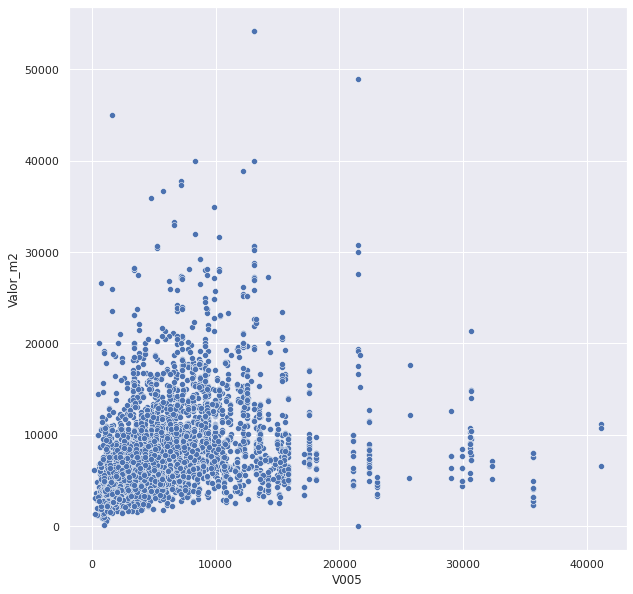

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

# Desafios

### 1 - Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda.

https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da

V005 - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

In [28]:
setor_censo_sp["CD_GEOCODD"] = setor_censo["CD_GEOCODD"].astype(float)
setor_censo_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18953 entries, 42322 to 62384
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          18953 non-null  float64 
 1   CD_GEOCODI  18953 non-null  object  
 2   TIPO        18953 non-null  object  
 3   CD_GEOCODS  18953 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  18953 non-null  float64 
 6   NM_DISTRIT  18953 non-null  object  
 7   CD_GEOCODM  18953 non-null  object  
 8   NM_MUNICIP  18953 non-null  object  
 9   NM_MICRO    18953 non-null  object  
 10  NM_MESO     18953 non-null  object  
 11  CD_GEOCODB  0 non-null      object  
 12  NM_BAIRRO   0 non-null      object  
 13  ID1         18953 non-null  int64   
 14  geometry    18953 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5319
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5320 non-null   object 
 1   Bairro                 5312 non-null   object 
 2   Cidade                 5320 non-null   object 
 3   Metragem               5320 non-null   int64  
 4   Quartos                5320 non-null   int64  
 5   Banheiros              5320 non-null   int64  
 6   Vagas                  5320 non-null   int64  
 7   Valor                  5320 non-null   object 
 8   Valor_anuncio          5320 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5320 non-null   float64
 11  Valor_m2               5320 non-null   float64
 12  rua                    5320 non-null   object 
 13  cep                    5320 non-null   float64
 14  latitude               5320 non-null   float64
 15  long

In [30]:
geo_censo_sp = pd.merge(left=setor_censo_sp, right=dados_vendas_censo[["Cod_distrito", "V005", "Valor_anuncio", "Valor_m2"]], 
                        how="left", left_on="CD_GEOCODD", right_on="Cod_distrito").drop_duplicates(subset=setor_censo_sp.columns)
geo_censo_sp

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST  \
0      109347.00  355030804000079  URBANO  35503080400       None   
25     109348.00  355030804000080  URBANO  35503080400       None   
50     109349.00  355030804000081  URBANO  35503080400       None   
75     109350.00  355030804000082  URBANO  35503080400       None   
100    109351.00  355030804000083  URBANO  35503080400       None   
...          ...              ...     ...          ...        ...   
958126 127887.00  355030896000243  URBANO  35503089600       None   
958129 127888.00  355030896000244  URBANO  35503089600       None   
958132 127889.00  355030896000245  URBANO  35503089600       None   
958135 127890.00  355030896000246  URBANO  35503089600       None   
958138 127891.00  355030896000247  URBANO  35503089600       None   

         CD_GEOCODD  NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  \
0      355030804.00  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
25     355030804.00  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
50     355030804.00  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
75     355030804.00  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
100    355030804.00  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
...             ...         ...        ...        ...        ...   
958126 355030896.00     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
958129 355030896.00     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
958132 355030896.00     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
958135 355030896.00     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
958138 355030896.00     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   

                           NM_MESO CD_GEOCODB NM_BAIRRO    ID1  \
0       METROPOLITANA DE SÃO PAULO       None      None  42323   
25      METROPOLITANA DE SÃO PAULO       None      None  42324   
50      METROPOLITANA DE SÃO PAULO       None      None  42325   
75      METROPOLITANA DE SÃO PAULO       None      None  42326   
100     METROPOLITANA DE SÃO PAULO       None      None  42327   
...                            ...        ...       ...    ...   
958126  METROPOLITANA DE SÃO PAULO       None      None  62381   
958129  METROPOLITANA DE SÃO PAULO       None      None  62382   
958132  METROPOLITANA DE SÃO PAULO       None      None  62383   
958135  METROPOLITANA DE SÃO PAULO       None      None  62384   
958138  METROPOLITANA DE SÃO PAULO       None      None  62385   

                                                 geometry  Cod_distrito  \
0       POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...  355030804.00   
25      POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...  355030804.00   
50      POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...  355030804.00   
75      POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...  355030804.00   
100     POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...  355030804.00   
...                                                   ...           ...   
958126  POLYGON ((-46.38853 -23.54385, -46.38852 -23.5...  355030896.00   
958129  POLYGON ((-46.38810 -23.54514, -46.38810 -23.5...  355030896.00   
958132  POLYGON ((-46.42363 -23.52079, -46.42341 -23.5...  355030896.00   
958135  POLYGON ((-46.42242 -23.52122, -46.42209 -23.5...  355030896.00   
958138  POLYGON ((-46.39705 -23.54418, -46.39704 -23.5...  355030896.00   

          V005  Valor_anuncio  Valor_m2  
0      1785.75      600000.00   4000.00  
25     1785.75      600000.00   4000.00  
50     1785.75      600000.00   4000.00  
75     1785.75      600000.00   4000.00  
100    1785.75      600000.00   4000.00  
...        ...            ...       ...  
958126  866.21      325000.00   1911.76  
958129  866.21      325000.00   1911.76  
958132  866.21      325000.00   1911.76  
958135  866.21      325000.00   1911.76  
958138  866.21      325000.00   1911.76  

[18953 rows x 19 columns]

In [31]:
geo_censo_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18953 entries, 0 to 958138
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             18953 non-null  float64 
 1   CD_GEOCODI     18953 non-null  object  
 2   TIPO           18953 non-null  object  
 3   CD_GEOCODS     18953 non-null  object  
 4   NM_SUBDIST     0 non-null      object  
 5   CD_GEOCODD     18953 non-null  float64 
 6   NM_DISTRIT     18953 non-null  object  
 7   CD_GEOCODM     18953 non-null  object  
 8   NM_MUNICIP     18953 non-null  object  
 9   NM_MICRO       18953 non-null  object  
 10  NM_MESO        18953 non-null  object  
 11  CD_GEOCODB     0 non-null      object  
 12  NM_BAIRRO      0 non-null      object  
 13  ID1            18953 non-null  int64   
 14  geometry       18953 non-null  geometry
 15  Cod_distrito   18455 non-null  float64 
 16  V005           18455 non-null  float64 
 17  Valor_anuncio  18455 n

In [32]:
sp_city = geo_censo_sp[geo_censo_sp["NM_MUNICIP"] == "SÃO PAULO"].reset_index(drop=True)
sp_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18953 entries, 0 to 18952
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             18953 non-null  float64 
 1   CD_GEOCODI     18953 non-null  object  
 2   TIPO           18953 non-null  object  
 3   CD_GEOCODS     18953 non-null  object  
 4   NM_SUBDIST     0 non-null      object  
 5   CD_GEOCODD     18953 non-null  float64 
 6   NM_DISTRIT     18953 non-null  object  
 7   CD_GEOCODM     18953 non-null  object  
 8   NM_MUNICIP     18953 non-null  object  
 9   NM_MICRO       18953 non-null  object  
 10  NM_MESO        18953 non-null  object  
 11  CD_GEOCODB     0 non-null      object  
 12  NM_BAIRRO      0 non-null      object  
 13  ID1            18953 non-null  int64   
 14  geometry       18953 non-null  geometry
 15  Cod_distrito   18455 non-null  float64 
 16  V005           18455 non-null  float64 
 17  Valor_anuncio  18455 no

Text(0.5, 1.0, 'Setores Censitários - Cidade de São Paulo')

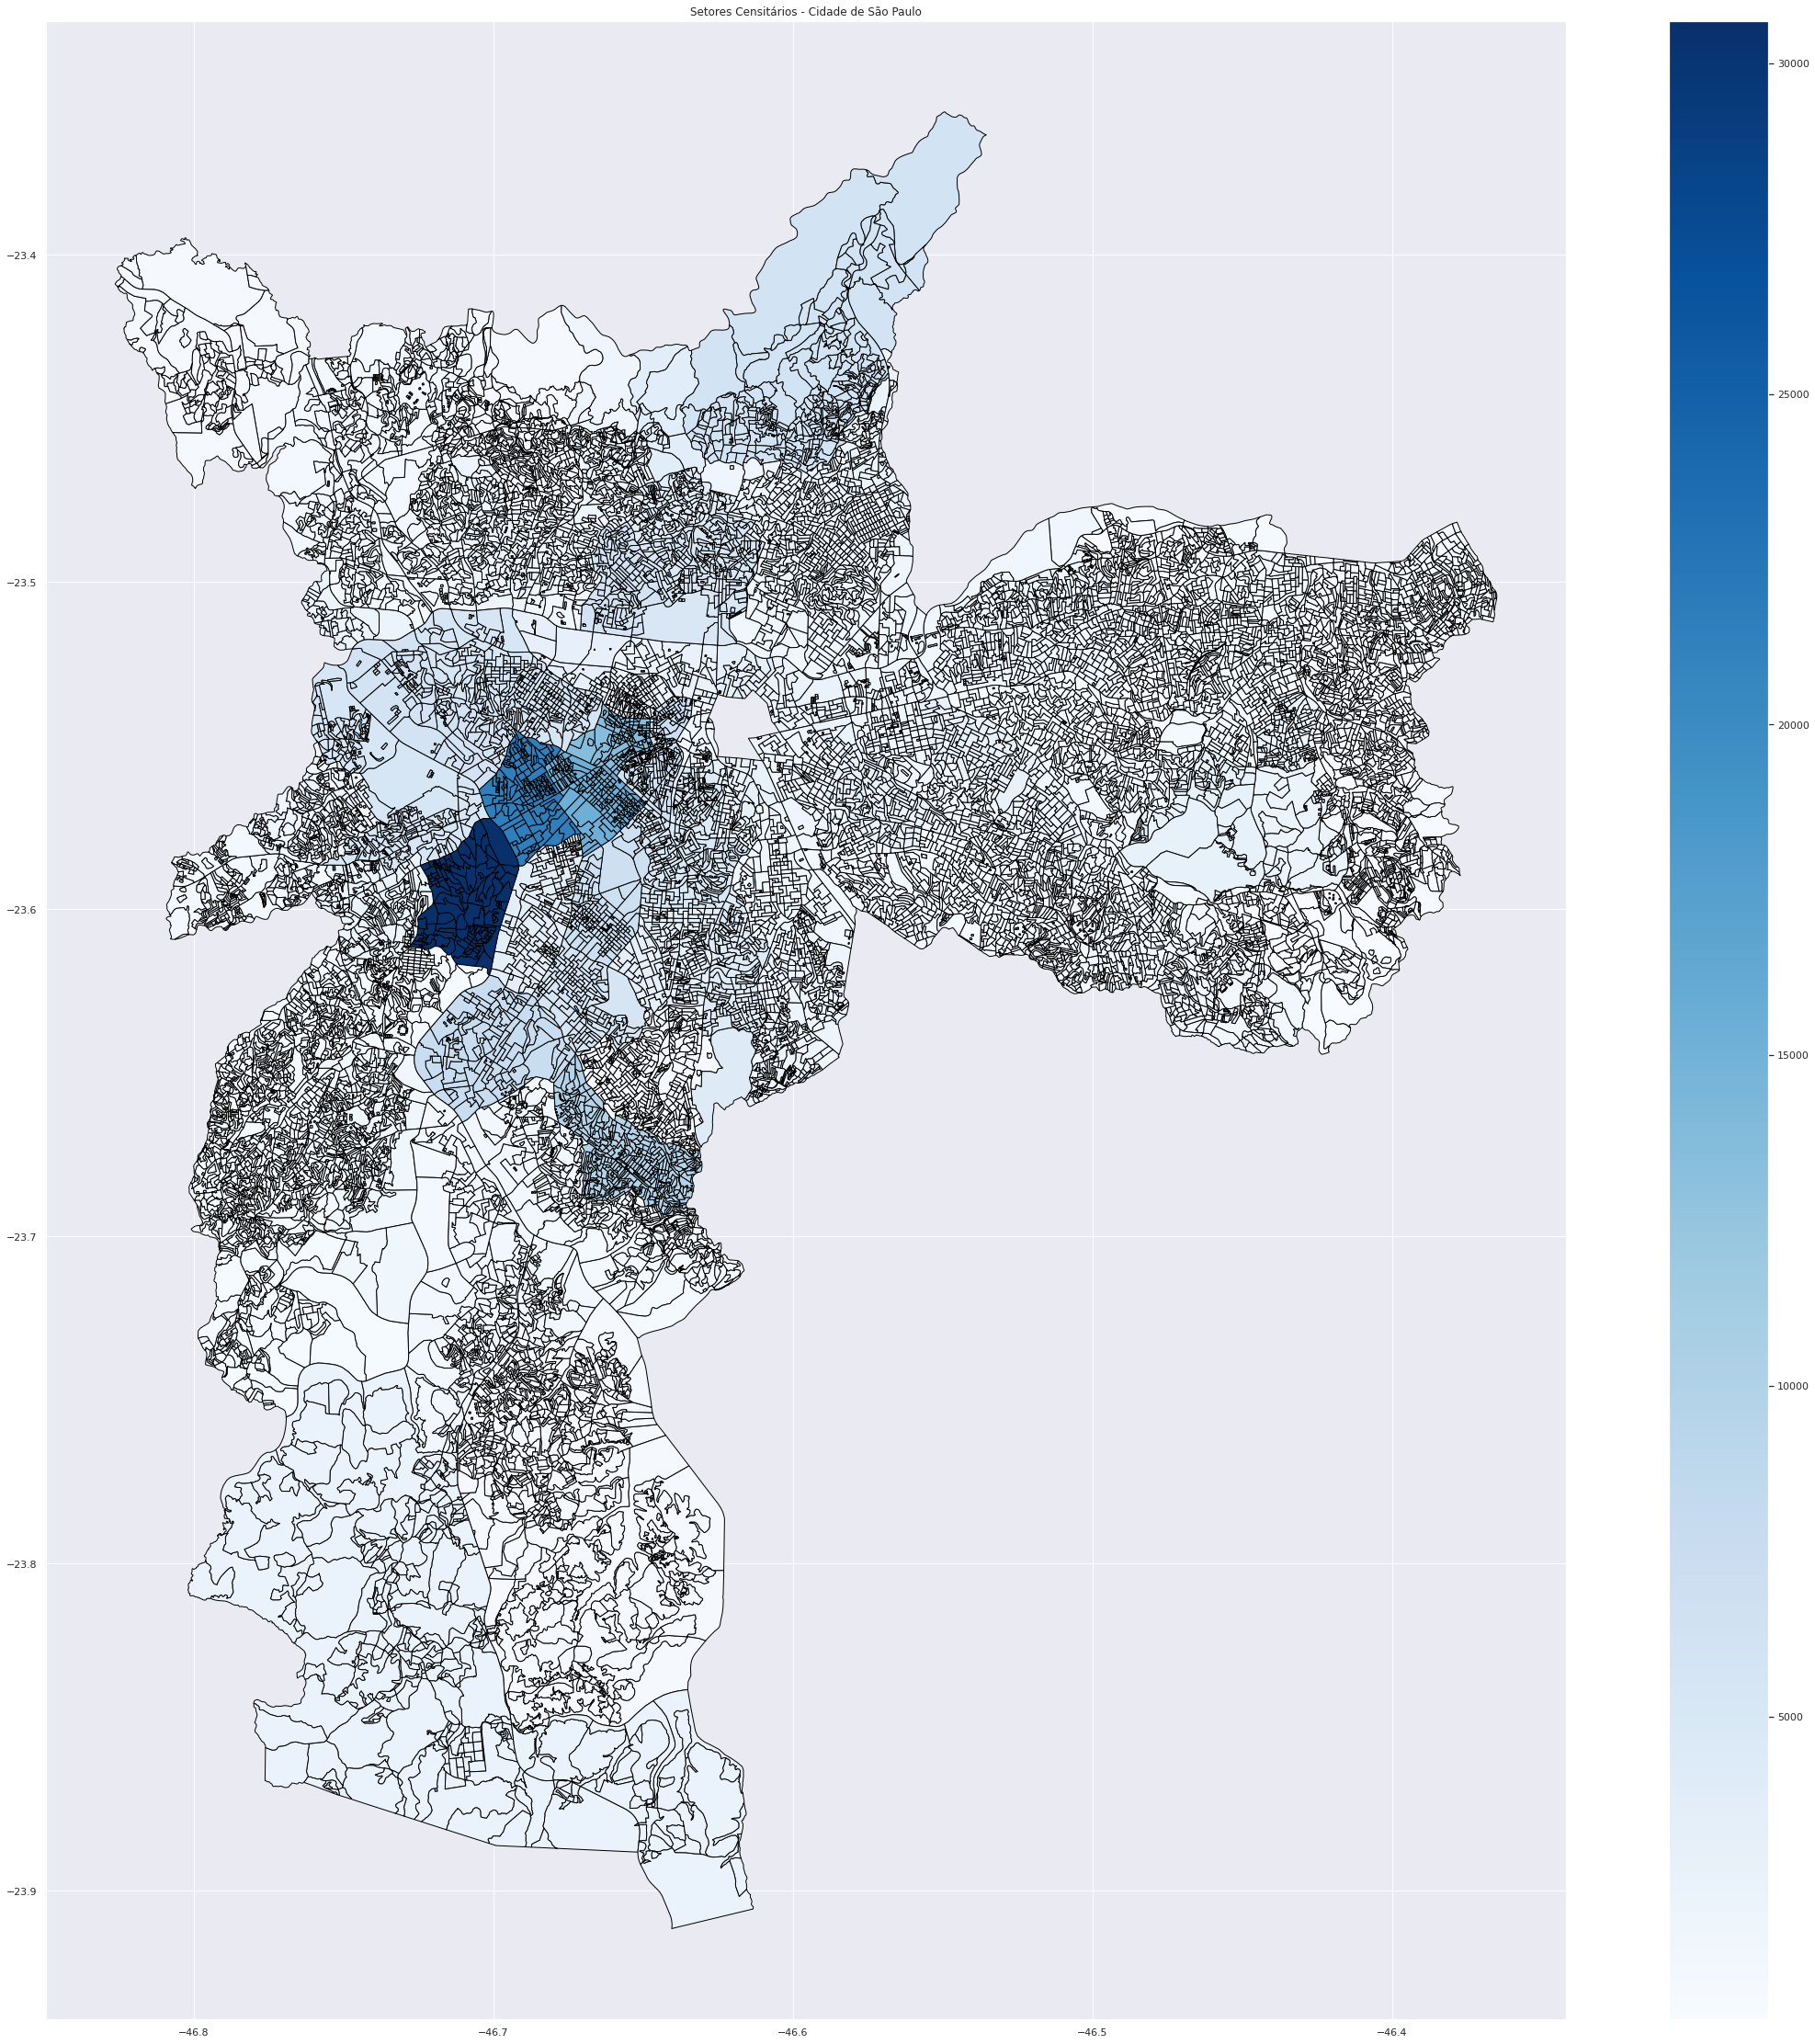

In [33]:
ax = sp_city.plot(figsize=(40,40), column="V005", cmap="Blues", edgecolor="Black", legend=True)
ax.set_title("Setores Censitários - Cidade de São Paulo")

Text(0.5, 1.0, 'Setores Censitários - Distrito Vila Mariana')

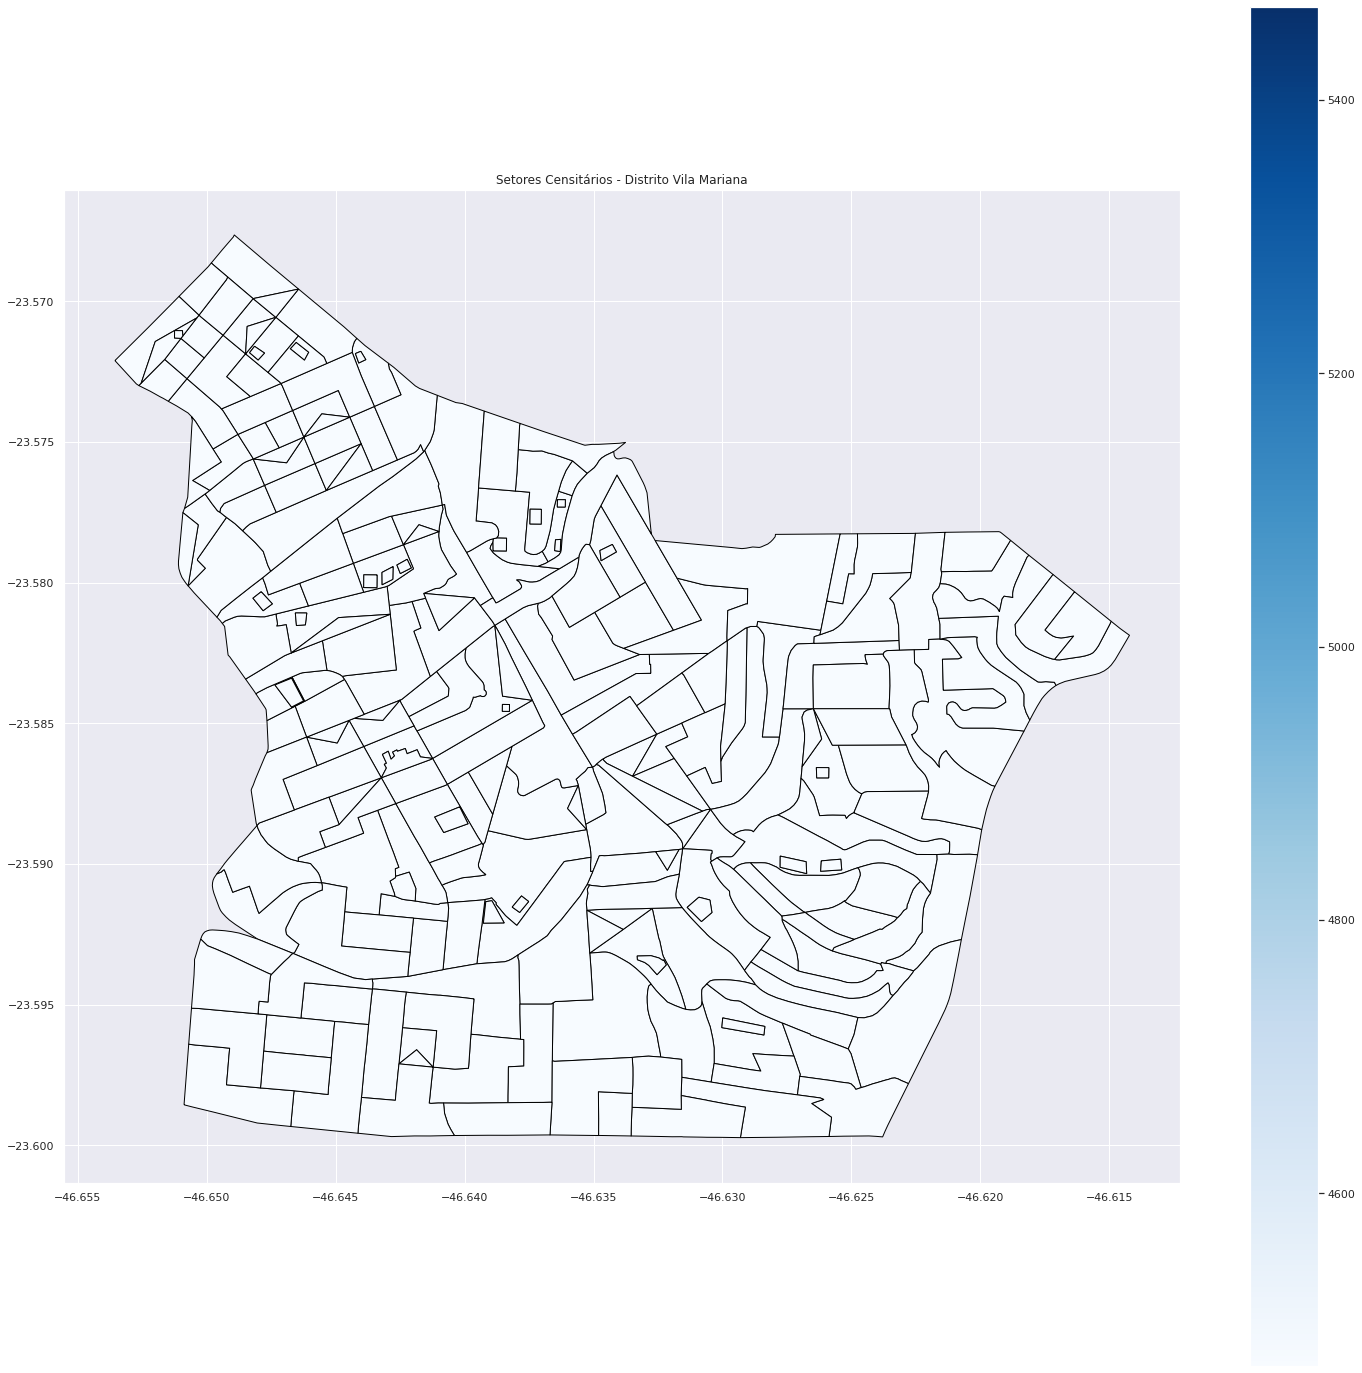

In [34]:
distrito_vila_mariana = geo_censo_sp[geo_censo_sp["NM_DISTRIT"] == "VILA MARIANA"].reset_index(drop=True)
ax = distrito_vila_mariana.plot(figsize=(25,25), column="V005", cmap="Blues", edgecolor="Black", legend=True)
ax.set_title("Setores Censitários - Distrito Vila Mariana")

### 2 - Repassar a aula para entender melhor o que foi realizado.

### 3 - Aprofundar a análise entre dados de vendas e renda.

Relação entre a renda média mensal e a quantidade de quartos por casa

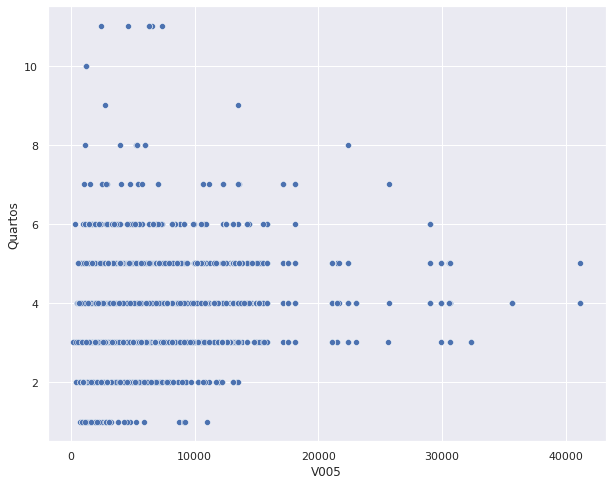

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dados_vendas_censo, x="V005", y="Quartos")
plt.show()

Relação entre a renda média mensal e a quantidade de banheiros por casa

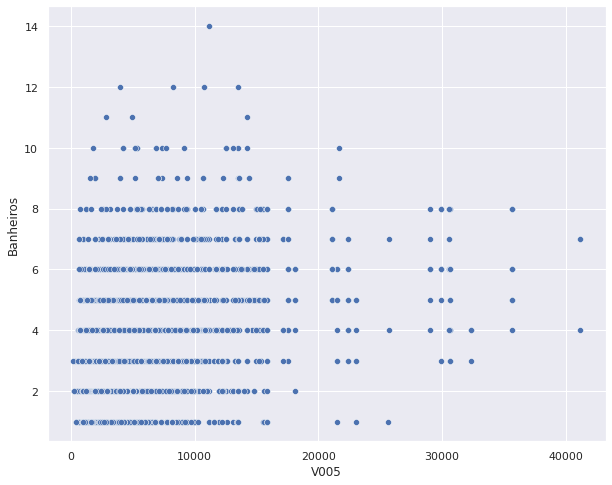

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dados_vendas_censo, x="V005", y="Banheiros")
plt.show()

Relação entre a renda média mensal e a quantidade de vagas disponíveis

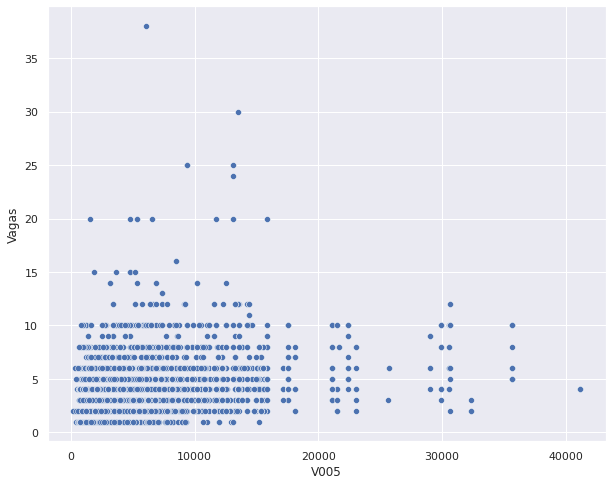

In [51]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dados_vendas_censo, x="V005", y="Vagas")
plt.show()

### 4 - Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

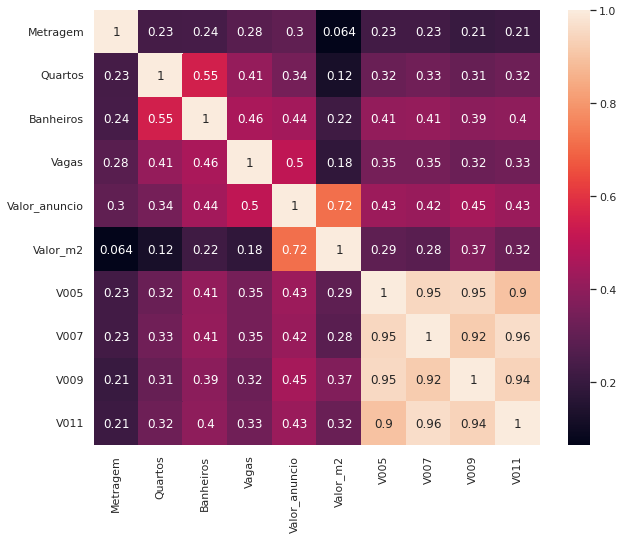

In [67]:
corr_valorm2 = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_m2', 'V005', 'V007', 'V009', 'V011']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_valorm2, annot = True)